# Lab 6
Noah Kim Section AC

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl
import random
plt.rcParams["figure.figsize"] = (10,6)

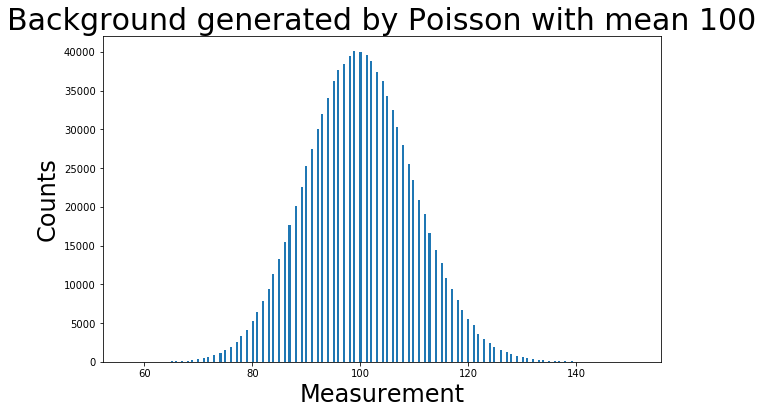

In [3]:
#Generating the random data in a poisson distribution
size = 1000000
poisson_dist = stats.poisson.rvs(100,size=size)
plt.hist(poisson_dist,bins=250)
plt.ylabel("Counts", fontsize = '24')
plt.xlabel("Measurement", fontsize = '24')
plt.title("Background generated by Poisson with mean 100", fontsize = '30')
plt.show()

## Problem 1
Determining the $5\sigma$ sensitivity threshold of my Poisson background.

In [4]:
prob = stats.norm.sf(5)
thresh = stats.poisson.isf(prob,100)
print(thresh)

154.0


## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

I decided to inject a signal with the value of 250 which falls between the 8-30$\sigma$ range. In order to do that I needed a signal to also count the number of particle events but instead of being centered around 100, I set the mean for the injected signal at 250.

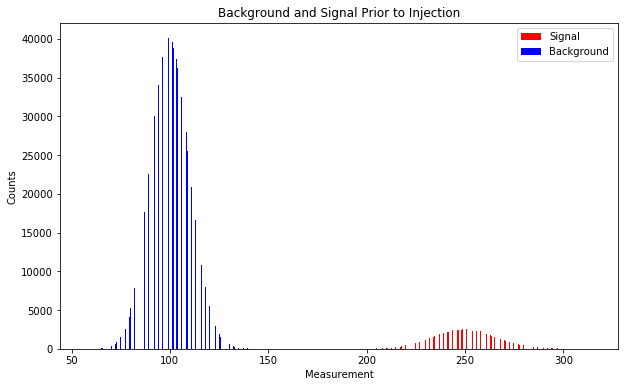

In [6]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, poisson_dist], bins = 400, color=['red','blue'],label=['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

Our background signal centered at 100 and our signal we are going to inject centered around 250 are plotted above. The signals do not overlap and we see that the signal is also going to be Poisson. 

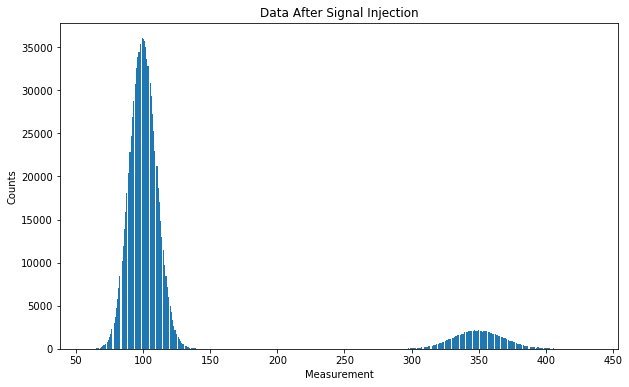

In [8]:
bkgd = poisson_dist;

signal_injected = np.zeros(bkgd.size)
for i in range(signal_injected.size):
    if i < signal.size:
        signal_injected[i] = np.add(bkgd[i], signal[i])
    else:
        signal_injected[i] = bkgd[i]

plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The observed signal has a shape of a typical poisson distribution. This makes sense because we randomly picked points from the dataset that is poisson-distributed. Therefore, the resulting picked set of data is also a poisson distribution. Also, this tells that the observed signal is not a single number but a range of values even though we injected a singal signal strength.

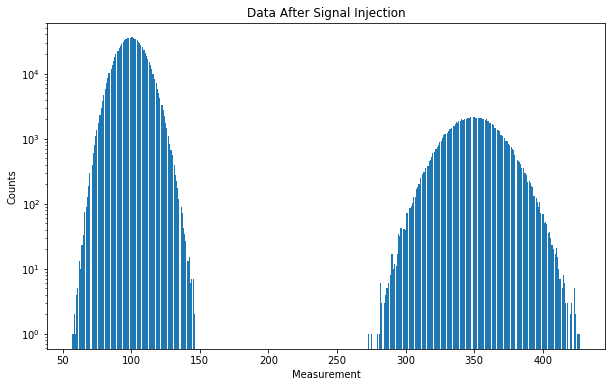

In [242]:
plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

From the plots above, we can see that the mean shifted for the injected signal from 250 to 350. The signal has moved by exactly 100 which is the mean of our background Poisson created at the start of the lab. We see this pattern because on average the background will produce 100 particle events and the signal on average will produce 250 particle events and these two events are independent of each other. So when both of these events occur at the same time the overall observed particles in an average signal event will take into account the background and will be the sum of the particles from the background + the particles from the signal being 250 + 100 = 350. This makes sense because our mean has moved 100 units to the right from the signal from 250 -> 350. The distribution maintains as a Poisson distribution because the sum of Poisson distributions is going to be a Poisson distribution. Even though it is a Poisson distribution. Due to the central limit theorem, the signal looks Gaussian because of the sample size I have is quite large. 



My observed signal biased 

## Problem 3

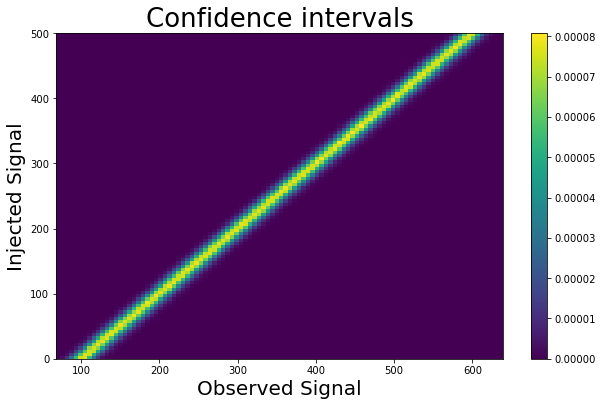

In [243]:
bkgd = poisson_dist;
signal = np.linspace(0,501,size);

observed = bkgd + signal;
h = plt.hist2d(observed, signal, bins = (100,100), density=True)
plt.colorbar(h[3])
plt.ylabel("Injected Signal", fontsize = "20")
plt.xlabel("Observed Signal", fontsize = "20")
plt.title("Confidence intervals", fontsize = "26")
plt.show()